<a href="https://colab.research.google.com/github/Alfian1706/BD3-kelompok1/blob/main/Analisis_Data_Text_SNBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: saya ingin memanggil data SNBP.csv yang telah saya unggah

import pandas as pd

# Ganti 'SNBP.csv' dengan nama file yang sesuai jika berbeda
SNBP = pd.read_csv('SNBP.csv')

# Menampilkan beberapa baris pertama data untuk verifikasi
print(SNBP.head())


   conversation_id_str                      created_at  favorite_count  \
0  1902495593794302210  Wed Mar 19 23:01:10 +0000 2025           10249   
1  1902281447685099606  Wed Mar 19 11:14:35 +0000 2025           42610   
2  1901919103432159455  Tue Mar 18 08:50:24 +0000 2025           35824   
3  1901920875940921752  Tue Mar 18 08:57:27 +0000 2025           19424   
4  1901908580313497742  Tue Mar 18 08:08:35 +0000 2025           22657   

                                           full_text               id_str  \
0   TIPS SKOR 750+ SNBT DALAM 1 BULAN Kak aku ga ...  1902495593794302210   
1  @sbmptnfess sedangkan yang kebanyakan lulus lu...  1902317772711055463   
2  ALHAMDULILLAH AKU LOLOS SNBP https://t.co/t0JK...  1901919103432159455   
3  Dulu aku gagal di SNBP tapi setelah itu aku bi...  1901920875940921752   
4  Nangis bangett adek ku keren bgtt coyy snbp IT...  1901908580313497742   

                                         image_url in_reply_to_screen_name  \
0  https://pbs

In [2]:
SNBP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      202 non-null    int64 
 1   created_at               202 non-null    object
 2   favorite_count           202 non-null    int64 
 3   full_text                202 non-null    object
 4   id_str                   202 non-null    int64 
 5   image_url                182 non-null    object
 6   in_reply_to_screen_name  7 non-null      object
 7   lang                     202 non-null    object
 8   location                 143 non-null    object
 9   quote_count              202 non-null    int64 
 10  reply_count              202 non-null    int64 
 11  retweet_count            202 non-null    int64 
 12  tweet_url                202 non-null    object
 13  user_id_str              202 non-null    int64 
 14  username                 202 non-null    o

**Tahapan Cleaning Data**

In [3]:
SNBP["full_text"]

,full_text
0,TIPS SKOR 750+ SNBT DALAM 1 BULAN Kak aku ga ...
1,@sbmptnfess sedangkan yang kebanyakan lulus lu...
2,ALHAMDULILLAH AKU LOLOS SNBP https://t.co/t0JK...
3,Dulu aku gagal di SNBP tapi setelah itu aku bi...
4,Nangis bangett adek ku keren bgtt coyy snbp IT...
...,...
197,stud! guys ada yg bisa kasih pembahasannya ga?...
198,stud! Ini caranya gimana yaa? https://t.co/TNy...
199,guyss alhamdulilah akuu senengg bngttt adekk a...
200,Saran untuk Maba 25 yg keterima snbp banyakin ...


In [4]:
#membuat function cleaning

import re
def clean(s):
    s = s.replace(r'<lb>', "\n")
    s = s.replace(r'<tab>', "\i")
    s = re.sub(r'<br */*>', "\n", s)
    s = s.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
    s = s.replace("&amp;", "&")
    # markdown urls
    s = re.sub(r'\(https*://[^\)]*\)', "", s)
    # normal urls
    s = re.sub(r'https*://[^\s]*', "", s)
    s = re.sub(r'_+', ' ', s)
    s = re.sub(r'"+', '"', s)
    return str(s)

In [5]:
#membuat sebuah variabel baru untuk menyimpan data hasil cleaning

SNBP["text_clean"] = ''

In [6]:
#Pembersihan text dari symbol
for i, row in SNBP.iterrows():
    SNBP.at[i, "text_clean"] = clean(row.full_text)

In [8]:
SNBP.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,text_clean
0,1902495593794302210,Wed Mar 19 23:01:10 +0000 2025,10249,TIPS SKOR 750+ SNBT DALAM 1 BULAN Kak aku ga ...,1902495593794302210,https://pbs.twimg.com/media/GmcFqAQa4AEzsrA.jpg,NaN,in,"DKI Jakarta, Indonesia",17,9,1926,https://x.com/studytipsntrik/status/1902495593...,1431851630652125190,studytipsntrik,TIPS SKOR 750+ SNBT DALAM 1 BULAN Kak aku ga ...
1,1902281447685099606,Wed Mar 19 11:14:35 +0000 2025,42610,@sbmptnfess sedangkan yang kebanyakan lulus lu...,1902317772711055463,NaN,sbmptnfess,in,NaN,193,126,4146,https://x.com/kiankaeye/status/190231777271105...,1752017644591710208,kiankaeye,@sbmptnfess sedangkan yang kebanyakan lulus lu...
2,1901919103432159455,Tue Mar 18 08:50:24 +0000 2025,35824,ALHAMDULILLAH AKU LOLOS SNBP https://t.co/t0JK...,1901919103432159455,https://pbs.twimg.com/media/GmT5V3CbMAAiTgO.jpg,NaN,in,Law'24,756,555,5693,https://x.com/plutonymz/status/190191910343215...,1732739112019558400,plutonymz,ALHAMDULILLAH AKU LOLOS SNBP
3,1901920875940921752,Tue Mar 18 08:57:27 +0000 2025,19424,Dulu aku gagal di SNBP tapi setelah itu aku bi...,1901920875940921752,https://pbs.twimg.com/media/GmT2382bwAAxnFY.jpg,NaN,in,Bandung-Jakarta,151,43,2884,https://x.com/ahnafau/status/1901920875940921752,1250114172345405441,ahnafau,Dulu aku gagal di SNBP tapi setelah itu aku bi...
4,1901908580313497742,Tue Mar 18 08:08:35 +0000 2025,22657,Nangis bangett adek ku keren bgtt coyy snbp IT...,1901908580313497742,https://pbs.twimg.com/media/GmTvxUVawAE54ft.jpg,NaN,in,she/her 20’,348,642,914,https://x.com/needsleepby/status/1901908580313...,996463696812490752,needsleepby,Nangis bangett adek ku keren bgtt coyy snbp IT...


In [9]:
SNBP[["full_text", "text_clean"]].head()

,full_text,text_clean
0,TIPS SKOR 750+ SNBT DALAM 1 BULAN Kak aku ga ...,TIPS SKOR 750+ SNBT DALAM 1 BULAN Kak aku ga ...
1,@sbmptnfess sedangkan yang kebanyakan lulus lu...,@sbmptnfess sedangkan yang kebanyakan lulus lu...
2,ALHAMDULILLAH AKU LOLOS SNBP https://t.co/t0JK...,ALHAMDULILLAH AKU LOLOS SNBP
3,Dulu aku gagal di SNBP tapi setelah itu aku bi...,Dulu aku gagal di SNBP tapi setelah itu aku bi...
4,Nangis bangett adek ku keren bgtt coyy snbp IT...,Nangis bangett adek ku keren bgtt coyy snbp IT...


NLTK Process

In [10]:
pip install nltk

In [11]:
#tokenisasi
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize,word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [12]:
#Contoh tokenisasi
example_text = "Hello there, how are you doing today? The weather is great today. The sky is blue. python is awsome"
print(sent_tokenize(example_text))
print(word_tokenize(example_text))

['Hello there, how are you doing today?', 'The weather is great today.', 'The sky is blue.', 'python is awsome']
['Hello', 'there', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', 'today', '.', 'The', 'sky', 'is', 'blue', '.', 'python', 'is', 'awsome']


In [13]:
# prompt: saya ingin melakukan tokenisasi seperi syntax 23 untuk SNBP["text_clean"]

# Tokenisasi kata pada kolom 'text_clean'
SNBP['tokenized_text'] = SNBP['text_clean'].apply(lambda x: word_tokenize(x))

# Menampilkan beberapa baris pertama data dengan kolom tokenized_text
print(SNBP[['text_clean', 'tokenized_text']].head())


                                          text_clean  \
0   TIPS SKOR 750+ SNBT DALAM 1 BULAN Kak aku ga ...   
1  @sbmptnfess sedangkan yang kebanyakan lulus lu...   
2                      ALHAMDULILLAH AKU LOLOS SNBP    
3  Dulu aku gagal di SNBP tapi setelah itu aku bi...   
4  Nangis bangett adek ku keren bgtt coyy snbp IT...   

                                      tokenized_text  
0  [TIPS, SKOR, 750+, SNBT, DALAM, 1, BULAN, Kak,...  
1  [@, sbmptnfess, sedangkan, yang, kebanyakan, l...  
2                  [ALHAMDULILLAH, AKU, LOLOS, SNBP]  
3  [Dulu, aku, gagal, di, SNBP, tapi, setelah, it...  
4  [Nangis, bangett, adek, ku, keren, bgtt, coyy,...  


In [14]:
SNBP["tokenized_text"].head()

,tokenized_text
0,"[TIPS, SKOR, 750+, SNBT, DALAM, 1, BULAN, Kak,..."
1,"[@, sbmptnfess, sedangkan, yang, kebanyakan, l..."
2,"[ALHAMDULILLAH, AKU, LOLOS, SNBP]"
3,"[Dulu, aku, gagal, di, SNBP, tapi, setelah, it..."
4,"[Nangis, bangett, adek, ku, keren, bgtt, coyy,..."


In [15]:
# prompt: saya ingin mengambil stopwords dalam bahasa indonesia

import nltk
nltk.download('stopwords')

# Mendapatkan daftar stopwords dalam bahasa Indonesia
from nltk.corpus import stopwords
stop_words_indonesia = stopwords.words('indonesian')

stop_words_indonesia


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [16]:
from nltk.corpus import stopwords
text = 'he is a good boy. he is very good in coding'
text = word_tokenize(text)
text_with_no_stopwords = [word for word in text if word not in stopwords.words('english')]
text_with_no_stopwords

['good', 'boy', '.', 'good', 'coding']

In [17]:
# prompt: saya ingin melakukan stopwords di SNBP["tokenized_text"]

# Mendapatkan daftar stopwords dalam bahasa Indonesia
stop_words_indonesia = stopwords.words('indonesian')

# Fungsi untuk menghapus stopwords dari list token
def remove_stopwords(token_list):
  return [word for word in token_list if word.lower() not in stop_words_indonesia]

# Menerapkan fungsi remove_stopwords ke kolom 'tokenized_text'
SNBP['tokenized_stopwords'] = SNBP['tokenized_text'].apply(remove_stopwords)

# Menampilkan beberapa baris pertama data dengan kolom tokenized_text_no_stopwords
SNBP[['tokenized_text', 'tokenized_stopwords']].head()


,tokenized_text,tokenized_stopwords
0,"[TIPS, SKOR, 750+, SNBT, DALAM, 1, BULAN, Kak,...","[TIPS, SKOR, 750+, SNBT, 1, Kak, ga, lolos, SN..."
1,"[@, sbmptnfess, sedangkan, yang, kebanyakan, l...","[@, sbmptnfess, kebanyakan, lulus, lulus, sisw..."
2,"[ALHAMDULILLAH, AKU, LOLOS, SNBP]","[ALHAMDULILLAH, LOLOS, SNBP]"
3,"[Dulu, aku, gagal, di, SNBP, tapi, setelah, it...","[gagal, SNBP, top, rank, nasional, TO, &, suks..."
4,"[Nangis, bangett, adek, ku, keren, bgtt, coyy,...","[Nangis, bangett, adek, ku, keren, bgtt, coyy,..."


Stemming

In [18]:
#Contoh Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()    ## Creating an object for porterstemmer
example_words = ['earn',"earning","earned","earns"]  ##Example words
for w in example_words:
    print(ps.stem(w))

earn
earn
earn
earn


In [19]:
# prompt: saya ingin melakukan stemming pada SNBP["tokenized_stopwords"] dalam bahasa indonesia

!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00


In [20]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Buat objek stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada list token
def stemming_sastrawi(token_list):
  return [stemmer.stem(word) for word in token_list]

# Terapkan fungsi stemming_sastrawi ke kolom 'tokenized_stopwords'
SNBP['stemmed_words'] = SNBP['tokenized_stopwords'].apply(stemming_sastrawi)

# Menampilkan beberapa baris pertama data dengan kolom stemmed_words
SNBP[['tokenized_stopwords', 'stemmed_words']]

,tokenized_stopwords,stemmed_words
0,"[TIPS, SKOR, 750+, SNBT, 1, Kak, ga, lolos, SN...","[tips, skor, 750, snbt, 1, kak, ga, lolos, snb..."
1,"[@, sbmptnfess, kebanyakan, lulus, lulus, sisw...","[, sbmptnfess, banyak, lulus, lulus, siswa, pr..."
2,"[ALHAMDULILLAH, LOLOS, SNBP]","[alhamdulillah, lolos, snbp]"
3,"[gagal, SNBP, top, rank, nasional, TO, &, suks...","[gagal, snbp, top, rank, nasional, to, , sukse..."
4,"[Nangis, bangett, adek, ku, keren, bgtt, coyy,...","[nang, bangett, adek, ku, keren, bgtt, coyy, s..."
...,...,...
197,"[stud, !, guys, yg, kasih, pembahasannya, ga, ?]","[stud, , guys, yg, kasih, bahas, ga, ]"
198,"[stud, !, gimana, yaa, ?]","[stud, , gimana, yaa, ]"
199,"[guyss, alhamdulilah, akuu, senengg, bngttt, a...","[guyss, alhamdulilah, akuu, senengg, bngttt, a..."
200,"[Saran, Maba, 25, yg, keterima, snbp, banyakin...","[saran, maba, 25, yg, terima, snbp, banyakin, ..."


In [21]:
# prompt: berikan saya syntax untuk membuat analisis sentimen untuk variabel stemmed_words

!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.3 MB/s eta 0:00:00


In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inisialisasi objek SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text_list):
    # Gabungkan list token menjadi satu string
    text = " ".join(text_list)

    # Lakukan analisis sentimen
    scores = analyzer.polarity_scores(text)

    # Kembalikan nilai compound score
    return scores['compound']

# Terapkan fungsi analyze_sentiment ke kolom 'stemmed_words'
SNBP['sentiment_score'] = SNBP['stemmed_words'].apply(analyze_sentiment)

In [23]:
# Menampilkan beberapa baris pertama data dengan kolom sentiment_score
print(SNBP[['stemmed_words', 'sentiment_score']].head())


                                       stemmed_words  sentiment_score
0  [tips, skor, 750, snbt, 1, kak, ga, lolos, snb...          -0.0516
1  [, sbmptnfess, banyak, lulus, lulus, siswa, pr...           0.0000
2                       [alhamdulillah, lolos, snbp]           0.0000
3  [gagal, snbp, top, rank, nasional, to, , sukse...           0.2023
4  [nang, bangett, adek, ku, keren, bgtt, coyy, s...           0.0000


In [24]:
# Membuat label setiap komentar

# Fungsi untuk menentukan label sentimen berdasarkan sentiment_score
def label_sentiment(score):
    if score < 0:
        return 'negatif'
    elif score == 0:
        return 'netral'
    else:
        return 'positif'

# Buat kolom baru 'sentiment_label' berdasarkan kolom 'sentiment_score'
SNBP['sentiment_label'] = SNBP['sentiment_score'].apply(label_sentiment)

# Menampilkan beberapa baris pertama data dengan kolom sentiment_label
print(SNBP[['stemmed_words', 'sentiment_score', 'sentiment_label']].head())


                                       stemmed_words  sentiment_score  \
0  [tips, skor, 750, snbt, 1, kak, ga, lolos, snb...          -0.0516   
1  [, sbmptnfess, banyak, lulus, lulus, siswa, pr...           0.0000   
2                       [alhamdulillah, lolos, snbp]           0.0000   
3  [gagal, snbp, top, rank, nasional, to, , sukse...           0.2023   
4  [nang, bangett, adek, ku, keren, bgtt, coyy, s...           0.0000   

  sentiment_label  
0         negatif  
1          netral  
2          netral  
3         positif  
4          netral  


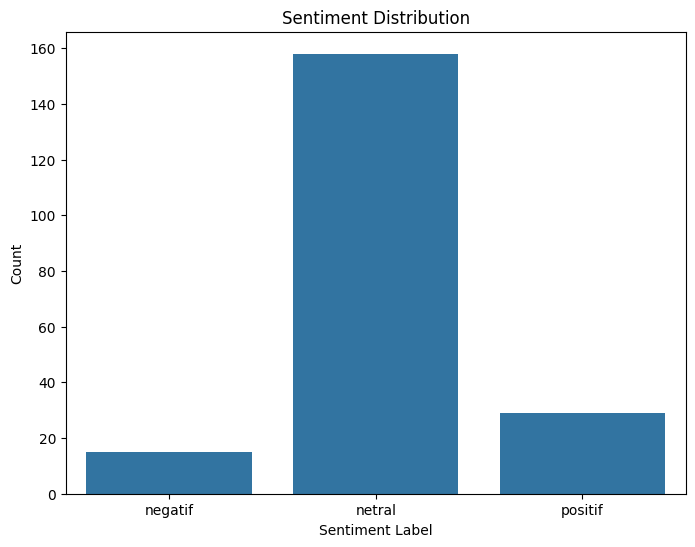

In [25]:
#Membuat grafik plot
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=SNBP)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()


In [26]:
# prompt: Buat word cloud dari setiap kategori

!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

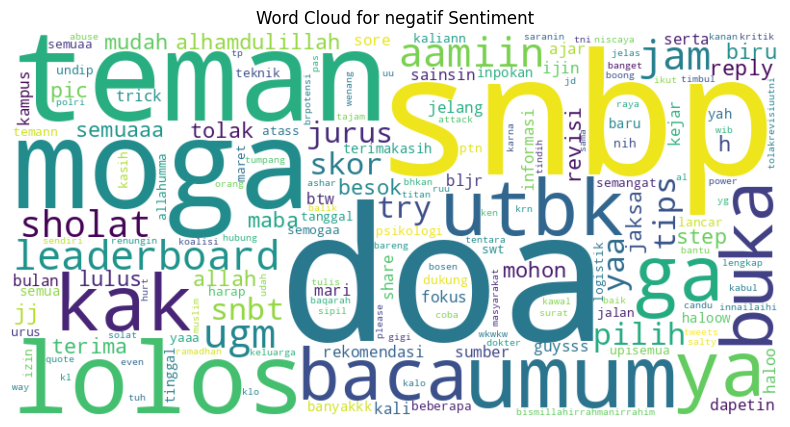

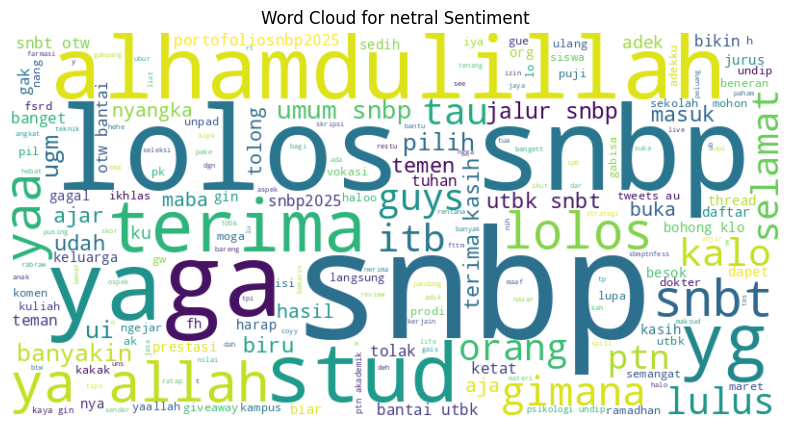

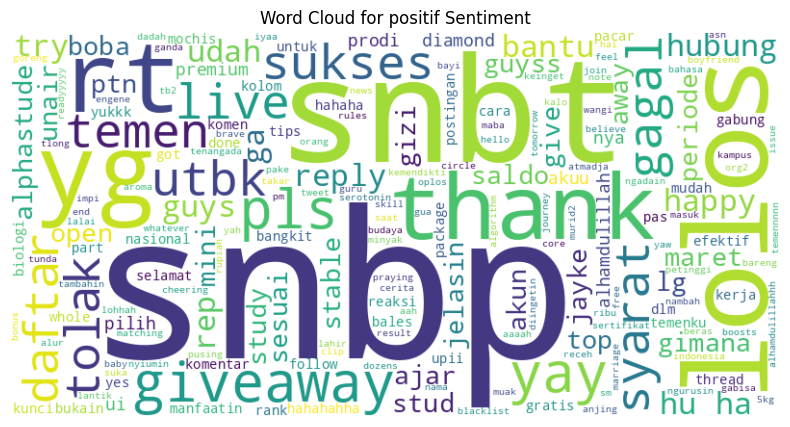

In [27]:

# Group data by sentiment label
sentiment_groups = SNBP.groupby('sentiment_label')

# Create word clouds for each sentiment category
for sentiment, group in sentiment_groups:
    # Combine all stemmed words in the group
    all_words = ' '.join([' '.join(words) for words in group['stemmed_words']])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()


Membuat Model Mechine Learning Untuk Memprediksi Sentimen